# 使用Tensor及Autograd实现机器学习

### 1.生成训练数据

In [1]:
import torch
from matplotlib import pyplot as plt

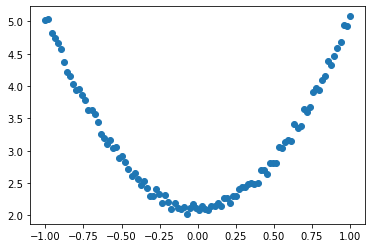

In [7]:
torch.manual_seed(100)
dtype = torch.float
# 生成x坐标数据，x为tensor，转成100x1的形状
# dim = 1表示列
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
# print(x)
# 生成y坐标数据，y为tensor，100x1的形状，并且加一点噪声
y = 3*x.pow(2)+2 + 0.2*torch.rand(x.size())
# 把tensor转成numpy画图
plt.scatter(x.numpy(), y.numpy())
plt.show()

### 2.初始化权重参数
> torch.rand和torch.randn有什么区别？
> - torch.rand均匀分布，torch.randn是标准正态分布。

In [12]:
# 随即初始化参数，参数w,b是需要学习的，所以requires_grad=True

w = torch.randn(1, 1, dtype=dtype, requires_grad=True)
# print(w)
b = torch.zeros(1, 1, dtype=dtype, requires_grad=True)
# print(b)

tensor([[0.]], requires_grad=True)


### 3.训练模型

In [13]:
lr = 0.001
for i in range(8000):
    # 前向传播 mm()矩阵乘法
    y_pred = x.pow(2).mm(w)+b
    # 损失函数
    loss = 0.5*(y_pred-y)**2
    loss = loss.sum()

    # 自动计算梯度
    loss.backward()
    # 手动更新参数，需要使用torch.no_grad()包围，使上下文中切断自动求导的计算
    with torch.no_grad():
        w -= lr*w.grad
        b -= lr*b.grad
        # 梯度清零
        w.grad.zero_()
        b.grad.zero_()

### 4.可视化训练结果

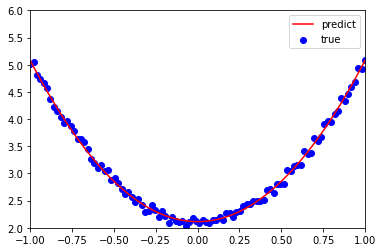

tensor([[2.9668]], requires_grad=True) tensor([[2.1138]], requires_grad=True)


In [17]:
plt.plot(x.numpy(), y_pred.detach().numpy(), 'r-', label='predict')
# 调用detach()不再计算张量梯度
plt.scatter(x.numpy(), y.numpy(), color='blue', marker='o', label='true')
plt.xlim(-1, 1)
plt.ylim(2, 6)
plt.legend()
plt.show()
# 预测结果
print(w, b)